# Project: Data Wrangling - [WeRateDogs Tweet Analysis]

#### Table of Contents
- Introduction
- Data Gathering
- Data Assessment
- Data Wrangling - Cleaning
- Exploratory Data Analysis
- Conclusions

## Introduction
In this project, I will be gathering data from 3 different sources, assess the data and clean, wrangle and then anaylse the data to provide a useful insight.

## Data Gathering
> During this stage, I will be gathering the 3 data required for this project programatically. The first data is an image prediction file located in a URL as a tsv, the second is a twitter achieve downloaded and saved on my computer as a csv file, the third file is a twitter achieved data which would be downloaded using Tweepy.

In [273]:
#import the required libraries
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### Image Prediction Data

In [274]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [275]:
import requests
image_prediction = requests.get(url)

In [276]:
#Read the file using pandas data frame
image_prediction_final = pd.read_csv(url, sep='\t')
image_prediction_final

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Image Prediction Columns
- **tweet_id**: is the unique id of each tweet.
- **jpg_url**: is the image file of the dog in each tweet.
- **img_num**: is the number of images in the tweet.
- **p1**: is the algorithm's #1 prediction for the image in the tweet.
- **p1_conf**: is how confident the algorithm is in its #1 prediction.
- **p1_dog**: is whether or not the #1 prediction is a breed of dog.
- **p2**: is the algorithm's second most likely prediction.
- **p2_conf**: is how confident the algorithm is in its #2 prediction.
- **p2_dog**: is whether or not the #2 prediction is a breed of dog.
- **p3**: is the algorithm's third most likely prediction.
- **p3_conf**: is how confident the algorithm is in its #3 prediction.
- **p3_dog**: is whether or not the #3 prediction is a breed of dog.

In [277]:
image_prediction_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [278]:
image_prediction_final.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [279]:
# check to see if any tweet is repeated
image_prediction_final.tweet_id.value_counts()

666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64

### Twitter Achieved Data

In [280]:
twitter_archive = pd.read_csv('1-twitter-archive-enhanced.csv')

In [281]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [282]:
twitter_archive.shape

(2356, 17)

In [283]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [284]:
# check for null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [285]:
twitter_archive.doggo.sort_values()

0        None
1567     None
1568     None
1569     None
1570     None
        ...  
818     doggo
384     doggo
385     doggo
425     doggo
447     doggo
Name: doggo, Length: 2356, dtype: object

In [286]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [287]:
# check to see if any tweet is repeated
twitter_archive.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [288]:
# check rating numerators
twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [289]:
# check rating denominators
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [290]:
#examine dog names for correctness
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [291]:
#group dog names for with lower case to group wrong names
twitter_archive[twitter_archive.name.str.lower() == twitter_archive.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [292]:
twitter_archive.loc[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


##### Achieved Twitter Columns
- **tweet_id**: is the unique id of each tweet.
- **in_reply_to_status_id**: is the response comment under the tweet.
- **in_reply_to_user_id**: s
- **timestamp**: is the time the tweet was posted.
- **source**: is the source of the tweet.
- **text**: is the text/words/content of the tweet.
- **retweeted_status_id**: is the id status of the last retweet 
- **retweeted_status_user_id**: is the user id of the last retweet status
- **retweeted_status_timestamp**: is the timestamp of the last retweet status
- **expanded_urls**: is the universal resource locator for the tweet
- **rating_denominator**: is the 
- **name**: is the dog name
- **doggo**: is the dog stage called doggo
- **floofer**: is the dog stage called floofer
- **pupper**: is the dog stage called pupper
- **puppo**: is the dog stage called puppo

### Tweet JSON Data - Retweet/Likes Count

### Note to Reviewer
For this section, the twitter data is meant to be gathered through the API using the codes below and access keys, however I was unable to get tghe required access keys due to verification issues. However, as instructed by the udacity instructor and Udacity reviewer, I have included the codes below which would have been used to extract the data from the twitter API.

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, auth, wait_on_rate_limit=True)

In [ ]:
# test by searching using one of the twitter ids
tweet = api.get_status('892420643555336193',tweet_mode='extended')
tweet._json()

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write(',')
        except AttributeError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

failed_process_tweets = {}
with open('tweet-json.txt', 'w') as outfile:
    file.write('[')
    for tweet_id in tweet_ids:
        try:
            print(f"processing tweet_id: {tweet_id}")
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write(',')
        except AttributeError as e:
            print(f"failed to process tweet_id:{tweet_id}")
            failed_process_tweets[tweet_id] = e
            pass            
    outfile.write('{}]')
end = timer()
print(end - start)
print(failed_process_tweets)

### Note to Reviewer
- The method below was used to extract the tweet json data due to authentification issued challenges encountered while trying to get twitter developer account access.

In [293]:
# extract and read json files
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
data = [ ]
for line in lines:
    data.append(json.loads(line))
data_json = pd.DataFrame(data)

In [294]:
data_json.shape

(2354, 31)

In [295]:
data_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [296]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [297]:
data_json.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [298]:
data_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [299]:
# check to see if any tweet is repeated
data_json.id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
774757898236878852    1
774639387460112384    1
774314403806253056    1
773985732834758656    1
666020888022790149    1
Name: id, Length: 2354, dtype: int64

##### Twitter JSON Columns
- **created_at**: is the time tweet was created
- **id**: is the tweet id
- **id_str**: is the tweet id as a string
- **full_text**: is the words on the tweet made
- **truncated**: is a bolean for whether tweet was truncated or not
- **display_text_range**: is the lenght of character in the tweet
- **entities**: is the tweet components such as hastags, symbols, usermentions, etc
- **extended_entities**: is the component and media details of tweet
- **source**: is the tweet source
- **in_reply_to_status_id**: is the status id of the tweet in reply
- **favorite_count**: number of favourites the tweet got
- **favorited**: is if tweet was favorited by the twitter handler or now
- **retweeted**: is if tweet was retweeted by the twitter handler or now
- **possibly_sensitive**:is if tweet was considered sensitive by twitter rule or not
- **possibly_sensitive_appealable**: is if an appeal could be made if tweet if cound sensitive based on twitter rules
- **lang**: language for the tweet
- **retweeted_status**: is the tweet retweeted status id
- **quoted_status_id**: is the tweet quoted status id
- **quoted_status_id_str**: is the quote/comments on the tweet
- **quoted_status**: is the status for the tweet quoted comments or reply

## Data Assessment

##### Data Quality
**Twitter Achieve Data**
- 1. Some of the rows are not useful for this analysis; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id.
- 2. Erroneous timestamp (+0000 at the end of each time stamp).
- 3. Erroneous timestamp is an object, should be a datetime.
- 4. Some of the do rows contain retweets data.
- 5. Some of the rows have multiple dog stages.
- 6. Duplicate tweet_id column in order to retain column after column has been converted to csv

**Tweeter JSON Data**
- 7. id_str should be an integer, not an object.

**Merged Data**
- 8. Some of the columns in the merged data are duplicated or unrequired.
- 9. Some of the names I saw during earlier assessment are wrong.

##### Data Tidiness
**Merged Data**
- 1. The areb 3 different files required for this analyis, having the data in different partition would make analysis difficult.
- 2. The dog prediction columns could be merged as one column to make data analysis more efficient.
- 3. Ratings are in numerator and denominator, not as a single float column as normally seen on rating websites

## Data cleaning

### Data Quality

#### 1. Define
###### Twitter Achieved Data
**Issue**: Some of the rows are not useful for this analysis; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id..


**Solution**: Drop the affected columns using drop method.

#### Code

In [300]:
twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id',],axis = 1, inplace = True)

#### Test

In [301]:
twitter_archive.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Define
###### Twitter Achieved Data
**Issue**: Erroneous timestamp (+0000 at the end of each time stamp).


**Solution**: Drop the +0000 at the end of the time stamp using split

#### Code

In [302]:

twitter_archive.timestamp = twitter_archive.timestamp.astype(str).str[:-6]

#### Test

In [303]:
twitter_archive.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

#### 3. Define
###### Twitter Achieved Data
**Issue**: Erroneous timestamp is an object, should be a datetime.

**Solution**: convert to datetime using datetime method


In [304]:
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)
twitter_archive.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### 4. Define
###### Twitter Achieved Data
**Issue**: Some of the do rows contain retweets data.

**Solution**: Remove affected rows by Querying rows with with retweet status and ids. Grab the index of the filtered dataframe using .index. Drop the rows based on the indices along axis =0

#### Code

In [305]:
selected_rows = twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]
selected_rows.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [306]:
selected_rows_index = selected_rows.index
selected_rows_index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [307]:
twitter_archive = twitter_archive.drop(selected_rows.index,axis=0)
twitter_archive

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Test

In [308]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   timestamp                   2175 non-null   datetime64[ns]
 2   source                      2175 non-null   object        
 3   text                        2175 non-null   object        
 4   retweeted_status_id         0 non-null      float64       
 5   retweeted_status_timestamp  0 non-null      object        
 6   expanded_urls               2117 non-null   object        
 7   rating_numerator            2175 non-null   int64         
 8   rating_denominator          2175 non-null   int64         
 9   name                        2175 non-null   object        
 10  doggo                       2175 non-null   object        
 11  floofer                     2175 non-null   object      

#### 5. Define
###### Twitter Achieved Data
- **Issue**: Some of the rows have multiple dog stages.
- **Solution**: Merge the dog columns into one single column as dog_age_stage and drop the other 4 columns.

#### Code

In [309]:
# Merge different dog types into a column dog_class
twitter_archive['dog_age_stage'] = twitter_archive[['puppo', 'pupper', 'floofer', 'doggo']].apply(lambda x: ','.join(x.astype(str)),axis=1)
twitter_archive['dog_age_stage'] = twitter_archive['dog_age_stage'].str.replace(r'(None,)', repl='')
twitter_archive.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)



/var/folders/f6/pkmnd4dn1slc9p4nygdq2xhw0000gn/T/ipykernel_52723/33823540.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive['dog_age_stage'] = twitter_archive['dog_age_stage'].str.replace(r'(None,)', repl='')


#### Test

In [310]:
twitter_archive.dog_age_stage.value_counts()

None             1831
pupper,None       224
doggo              75
puppo,None         24
pupper,doggo       10
floofer,None        9
puppo,doggo         1
floofer,doggo       1
Name: dog_age_stage, dtype: int64

##### Twitter Achieved Data
#### 6 . Define
- **Issue**: Duplicate tweet_id column in order to retain column after column has been converted to csv.
- **Solution**: duplicate tweet_id column

#### Test

In [311]:
twitter_archive['tweet_id_duplicated'] = twitter_archive.loc[:,'tweet_id']

#### Test

In [312]:
twitter_archive.tweet_id_duplicated.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id_duplicated, dtype: int64

#### 7. Define
###### Tweeter JSON Data
**Issue**: id_str should be an integer, not an object.

**Solution**: convert onject to integer using as type method 

#### Code

In [313]:
data_json.id_str = data_json.id_str.astype(str).astype(int)

#### Test

In [314]:
data_json.id_str.dtypes

dtype('int64')

### Data Tidiness

#### Merged Data
#### 1. Define
- **Issue**: The areb 3 different files required for this analyis, having the data in different partition would make analysis difficult.
- **Solution**: Merge the 3 data using join method to form a merged file.

#### Code

In [315]:
merged_df = image_prediction_final.set_index('tweet_id').join(twitter_archive.set_index('tweet_id'),lsuffix='_imagePred', rsuffix='_twitterArc')
merged_df = merged_df.join(data_json.set_index('id'),lsuffix='', rsuffix='_jsonData')


#### Test

In [316]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   jpg_url                        2075 non-null   object        
 1   img_num                        2075 non-null   int64         
 2   p1                             2075 non-null   object        
 3   p1_conf                        2075 non-null   float64       
 4   p1_dog                         2075 non-null   bool          
 5   p2                             2075 non-null   object        
 6   p2_conf                        2075 non-null   float64       
 7   p2_dog                         2075 non-null   bool          
 8   p3                             2075 non-null   object        
 9   p3_conf                        2075 non-null   float64       
 10  p3_dog                         2075 non-null   bool  

In [317]:
merged_df.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
tweet_id,,,,,,,,,,,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,...,2535.0,False,False,False,False,en,NaN,NaN,NaN,NaN
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,...,132.0,False,False,False,False,en,NaN,NaN,NaN,NaN
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,...,128.0,False,False,False,False,en,NaN,NaN,NaN,NaN
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,...,311.0,False,False,False,False,en,NaN,NaN,NaN,NaN
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,...,111.0,False,False,False,False,en,NaN,NaN,NaN,NaN


#### Merged Data
#### 2 . Define
- **Issue**: The dog prediction columns could be merged as one column to make data analysis more efficient
- **Solution**: Extract dog prediction from the columns and drop the repeated dog prediction columns

#### Code

In [318]:
import numpy as np
def dog_breed(row):
    breed_conf = 0
    breed = ''
    is_breed = False
    if(row.p1_dog == True):
        if(row.p1_conf >= breed_conf):
            breed_conf = row.p1_conf
            breed = row.p1
            is_breed = True
    if(row.p2_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p2_conf
            breed = row.p2
            is_breed = True
    if(row.p3_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p3_conf
            breed = row.p3
            is_breed = True
    if is_breed == False:
        return np.nan
    else:
        return breed
        
        
    
merged_df['breed'] = merged_df.apply(dog_breed,axis=1)

In [319]:
# Drop the prediction columns to make the table cleaner
merged_df.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3', 'p3_conf', 'p3_dog'],inplace=True)

#### Test

In [320]:
merged_df.breed.value_counts()

golden_retriever        165
Labrador_retriever      116
Pembroke                 95
Chihuahua                92
pug                      65
                       ... 
Irish_wolfhound           1
Scotch_terrier            1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: breed, Length: 113, dtype: int64

In [321]:
merged_df.breed.info()

<class 'pandas.core.series.Series'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Series name: breed
Non-Null Count  Dtype 
--------------  ----- 
1751 non-null   object
dtypes: object(1)
memory usage: 97.0+ KB


In [322]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   jpg_url                        2075 non-null   object        
 1   img_num                        2075 non-null   int64         
 2   timestamp                      1994 non-null   datetime64[ns]
 3   source                         1994 non-null   object        
 4   text                           1994 non-null   object        
 5   retweeted_status_id            0 non-null      float64       
 6   retweeted_status_timestamp     0 non-null      object        
 7   expanded_urls                  1994 non-null   object        
 8   rating_numerator               1994 non-null   float64       
 9   rating_denominator             1994 non-null   float64       
 10  name                           1994 non-null   object

#### Merged Data
#### 3 . Define
- **Issue**: Ratings are in numerator and denominator, not as a single float column as normally seen on rating websites
- **Solution**: create a new column called ratings by dividing rating_numerator by rating_denominator

#### Code

In [323]:
merged_df['ratings'] = (merged_df.rating_numerator / merged_df.rating_denominator).astype(float) 

#### Test

In [324]:
merged_df.ratings.head()

tweet_id
666020888022790149    0.8
666029285002620928    0.7
666033412701032449    0.9
666044226329800704    0.6
666049248165822465    0.5
Name: ratings, dtype: float64

### Data Quality

#### Merged Data
#### 8. Define
- **Issue**: Some of the columns in the merged data are duplicated or unrequired.
- **Solution**: Remove affected columns from the dataframe using frop method.

#### Code

In [325]:
merged_df.drop(columns=['rating_numerator','rating_denominator','expanded_urls','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','created_at','truncated','entities','extended_entities','img_num','jpg_url','source','user','geo','coordinates','coordinates','source_jsonData','quoted_status_id','quoted_status_id_str','quoted_status','id_str'], inplace=True)


#### Test

In [326]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   timestamp                      1994 non-null   datetime64[ns]
 1   text                           1994 non-null   object        
 2   retweeted_status_id            0 non-null      float64       
 3   retweeted_status_timestamp     0 non-null      object        
 4   name                           1994 non-null   object        
 5   dog_age_stage                  1994 non-null   object        
 6   tweet_id_duplicated            1994 non-null   float64       
 7   full_text                      2073 non-null   object        
 8   display_text_range             2073 non-null   object        
 9   place                          1 non-null      object        
 10  contributors                   0 non-null      object

#### Merged Data
#### 9 . Define
- **Issue**: Some of the names I saw during earlier assessment are wrong
- **Solution**: Convert wrong names to NaN

#### Code

In [327]:
#convert lower case names to NaN
merged_df.name = merged_df.name.apply(lambda x: x if str(x).lower() != x else np.NaN)

In [328]:
#replace None strings to NaN
merged_df.name = merged_df.name.replace('None', np.NaN)

#### Test

In [329]:
merged_df[merged_df.name.str.lower() == merged_df.name].name.unique()

array([], dtype=object)

In [330]:
merged_df.name.unique()

array([nan, 'Walter', 'Scout', 'Kreggory', 'Jimothy', 'Christoper',
       'Lugan', 'Josep', 'Jockson', 'Jeph', 'Carll', 'Klevin', 'Keet',
       'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie', 'Kenneth',
       'Clarence', 'Timison', 'Joshwa', 'Genevieve', 'Fwed', 'Biden',
       'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook', 'Naphaniel',
       'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Filup', 'Shaggy',
       'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy',
       'Alfie', 'Skittles', 'Ron', 'Torque', 'Bisquick', 'Jareld',
       'Sophie', 'Rusty', 'DayZ', 'Jo', 'Gòrdón', 'Spark', 'Marvin',
       'Kallie', 'Jomathan', 'Maks', 'Timofy', 'Zeek', 'Hanz', 'Winifred',
       'Kevon', 'Banditt', 'Bobb', 'Amélie', 'Ruffles', 'Lambeau',
       'Herald', 'Jaycob', 'Jeremy', 'Chaz', 'Ruby', 'Bernie', 'Harrison',
       'Terrance', 'Tucker', 'Samsom', 'Jaspers', 'Clarq', 'Ralf', 'Kirk',
       'Sully', 'Tessa', 'Dug', 'Saydee', 'Chip', 'Oliviér', 'Billl',
       'Rond

#### Store cleaned dataframe in a csv as advised on task instruction

In [331]:
merged_df.to_csv('twitter_archive_master.csv', index=False)

## Exploratory Data Analysis

In [332]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head(2)

,timestamp,text,retweeted_status_id,retweeted_status_timestamp,name,dog_age_stage,tweet_id_duplicated,full_text,display_text_range,place,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,breed,ratings
0,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,None,6.660209e+17,Here we have a Japanese Irish Setter. Lost eye...,"[0, 131]",NaN,...,532.0,2535.0,False,False,False,False,en,NaN,Welsh_springer_spaniel,0.8
1,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,None,6.660293e+17,This is a western brown Mitsubishi terrier. Up...,"[0, 139]",NaN,...,48.0,132.0,False,False,False,False,en,NaN,redbone,0.7


In [333]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timestamp                      1994 non-null   object 
 1   text                           1994 non-null   object 
 2   retweeted_status_id            0 non-null      float64
 3   retweeted_status_timestamp     0 non-null      float64
 4   name                           1350 non-null   object 
 5   dog_age_stage                  1994 non-null   object 
 6   tweet_id_duplicated            1994 non-null   float64
 7   full_text                      2073 non-null   object 
 8   display_text_range             2073 non-null   object 
 9   place                          1 non-null      object 
 10  contributors                   0 non-null      float64
 11  is_quote_status                2073 non-null   object 
 12  retweet_count                  2073 non-null   f

#### 1. Most Liked Dog

In [334]:
twitter_archive_master[twitter_archive_master.favorite_count == twitter_archive_master.favorite_count.max()]

,timestamp,text,retweeted_status_id,retweeted_status_timestamp,name,dog_age_stage,tweet_id_duplicated,full_text,display_text_range,place,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,breed,ratings
1744,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,NaN,NaN,NaN,"puppo,None",8.228729e+17,Here's a super supportive puppo participating ...,"[0, 87]",NaN,...,48265.0,132810.0,False,False,False,False,en,NaN,Lakeland_terrier,1.3


- Lakeland_terrier breed was the most favorite dog with tweet id 822872901745569793 generating 132810 likes (favorite count)

#### 2. Most Retweeted Dog

In [335]:
max_retweet = twitter_archive_master[twitter_archive_master.retweet_count == twitter_archive_master.retweet_count.max()]
max_retweet

,timestamp,text,retweeted_status_id,retweeted_status_timestamp,name,dog_age_stage,tweet_id_duplicated,full_text,display_text_range,place,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,breed,ratings
1221,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,doggo,7.442348e+17,Here's a doggo realizing you can stand in a po...,"[0, 91]",NaN,...,79515.0,131075.0,False,False,False,False,en,NaN,Labrador_retriever,1.3


- Labrador_retriever was the most retweeted dog with tweet id 744234799360020481 generating 79,515 retweet counts

#### 3. Top  10 Rated Dogs

In [336]:
dog_ratings = twitter_archive_master.query('breed == breed')[['ratings', 'breed']].groupby('breed').mean()
dog_ratings.head()

,ratings
breed,
Afghan_hound,0.966667
Airedale,0.976923
American_Staffordshire_terrier,1.100000
Appenzeller,1.100000
Australian_terrier,1.150000


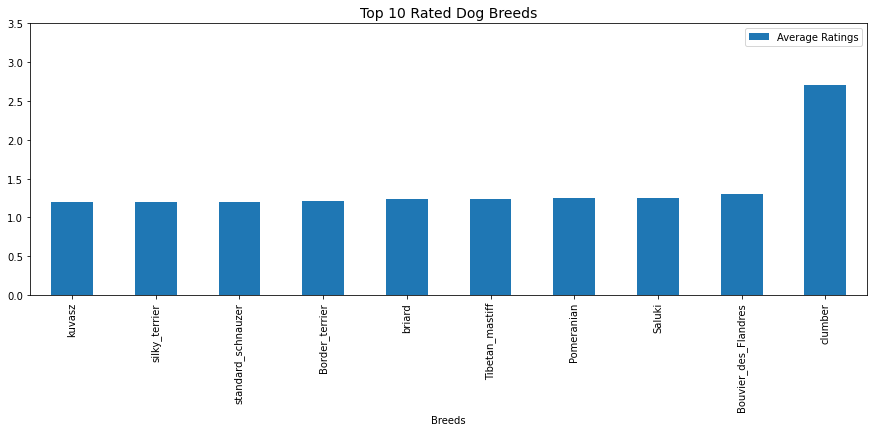

In [337]:
dog_ratings.sort_values(by=['ratings']).tail(10).plot.bar(figsize=(15,5))
plt.ylim(top = 3.5)
plt.title("Top 10 Rated Dog Breeds",{'fontsize': 14})
plt.xlabel("Breeds")
plt.legend(["Average Ratings"])

#### 4. Least 10 Rated Dogs

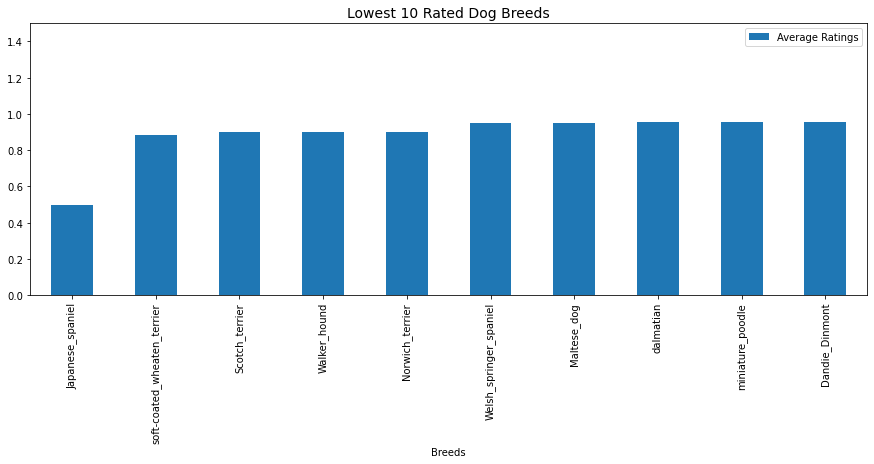

In [338]:
dog_ratings.sort_values(by=['ratings']).head(10).plot.bar(figsize=(15,5))
plt.ylim(top = 1.5)
plt.title("Lowest 10 Rated Dog Breeds",{'fontsize': 14})
plt.xlabel("Breeds")
plt.legend(["Average Ratings"])

#### 5. Dog Age Stages

In [339]:
dog_stage = twitter_archive_master.dog_age_stage.value_counts()
dog_stage

None             1688
pupper,None       203
doggo              63
puppo,None         22
pupper,doggo        9
floofer,None        7
floofer,doggo       1
puppo,doggo         1
Name: dog_age_stage, dtype: int64

#### 6. Ratings by Dog Age Stages

In [340]:
dog_stage_ratings = twitter_archive_master.query('dog_age_stage == dog_age_stage')[['ratings', 'dog_age_stage']].groupby('dog_age_stage').mean()
dog_stage_ratings.head()

,ratings
dog_age_stage,
None,1.180085
doggo,1.188889
"floofer,None",1.200000
"floofer,doggo",1.100000
"pupper,None",1.071429


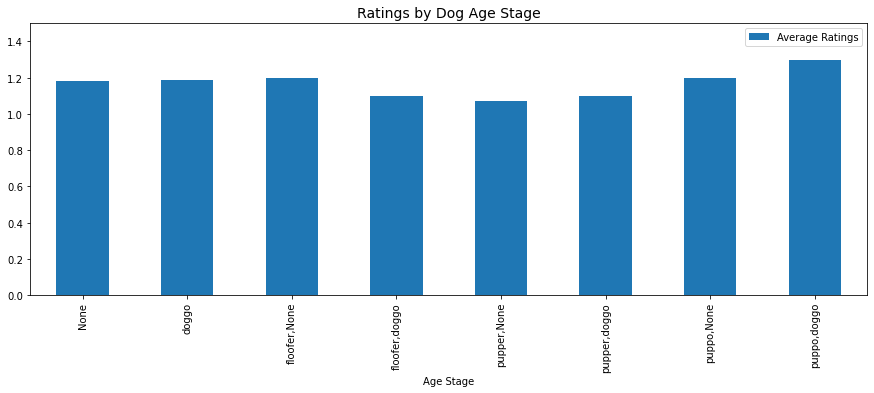

In [341]:
dog_stage_ratings.sort_values(by=['dog_age_stage']).plot.bar(figsize=(15,5))
plt.ylim(top = 1.5)
plt.title("Ratings by Dog Age Stage",{'fontsize': 14})
plt.xlabel("Age Stage")
plt.legend(["Average Ratings"])